In [1]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import datetime
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

605


In [3]:
# Create data storage

name = []
cloudiness = []
country = []
date = []
humid = []
lat = []
lng = []
max_temp = []
wind = []

# Get requests from Open Weather API

for city in cities:
    units="imperial"
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&units=" + units + "&appid=" + weather_api_key
    response = requests.get(url).json()
    
# If the city is found, store the weather data

    if response['cod'] == 200:
        name.append(response["name"])       
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])  
        humid.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        
# Include a print log of each city as it's being processed (with the city number and city name)

        print(response['id'],response['name'])
    
    

3628473 San Cristobal
5882953 Aklavik
2206939 Bluff
935215 Saint-Philippe
4030556 Rikitea
2063036 Port Lincoln
2276492 Harper
3372472 Vila Franca do Campo
290030 Doha
6542001 Bari
4035715 Avarua
2015306 Tiksi
1855540 Naze
3421765 Nanortalik
2155415 New Norfolk
5848280 Kapaa
2014624 Udachny
5106841 Albany
1282256 Hithadhoo
3874787 Punta Arenas
6201424 Mataura
1648186 Bontang
5866583 Saint Paul Harbor
2074865 Carnarvon
2075265 Busselton
3615745 Waslala
2126682 Bilibino
3369157 Cape Town
905846 Mpika
1684803 Tabuk
3336897 La Rioja
3366880 Hermanus
5384170 Pomona
1244926 Hambantota
3835869 Santiago del Estero
3466704 Castro
3833367 Ushuaia
2455290 Kidal
3137469 Sørland
6185377 Yellowknife
2236568 Uíge
1106677 Bambous Virieux
3864299 Bermejo
1651810 Airai
3932145 Pisco
3450144 Santa Luzia
4031574 Provideniya
372753 Kassala
2138555 Poum
504341 Pskov
110690 Faya
5880054 Barrow
6170031 Tuktoyaktuk
335035 Harar
4032243 Vaini
2409914 Bonthe
7601762 Bairiki Village
310858 Kahramanmaraş Province
2

212902 Kindu
492944 Sim
778362 Øksfjord
1701054 Marawi
4996248 Holland
1621313 Ambulu
2521582 Arona
167357 Manbij
157107 Kirando
2654332 Buncrana
463343 Zheleznogorsk
1719075 Canjulao
497927 Segezha
2270385 Camacha
2422383 Dalaba
3465329 Coruripe
3454005 Piaçabuçu
3374333 Praia
2191562 Dunedin
3462315 Governador Valadares
1491230 Sovetskiy
4153188 Destin
2037485 Erenhot
2140558 Koumac
3357247 Gobabis
1855612 Nara
677672 Gălbinaşi
5962442 Goderich
2129211 Misawa
1803936 Wuwei
1627969 Wonogiri
1269811 Idukki
1079048 Ambovombe
1283285 Jumla
3467512 Canguçu
1821274 Macao
1563281 Tuy Hoa
104515 Makkah al Mukarramah
3467747 Campo Grande
3472344 América Dourada
609919 Quryq
2624652 Holme
3517970 Pochutla
3691954 Sechura
2168305 Dubbo
6331908 Milton
1224061 Wattegama
4154205 Edgewater
6167817 Torbay
610612 Aktau
1213855 Sibolga
3576994 Cockburn Town
209598 Manono
2079582 Alyangula
3670745 Riohacha
3662927 Pauini
1794971 Shitanjing
4031637 Lavrentiya
1728675 Balabac
1259184 Puri
3870243 Taltal


In [4]:
# Create a data frame from the weather data

weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humid,
    "Cloudiness": cloudiness,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}

city_weather_df = pd.DataFrame(weather_dict)


In [5]:
# View data frame
city_weather_df.style.hide_index()

City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
San Cristobal,7.770000,-72.220000,65.750000,86,100,1.990000,VE,1597733679
Aklavik,68.220000,-135.010000,55.400000,66,5,2.240000,CA,1597733284
Bluff,-46.600000,168.330000,45.720000,73,100,5.100000,NZ,1597733279
Saint-Philippe,-21.360000,55.770000,77.000000,53,20,6.930000,RE,1597733289
Rikitea,-23.120000,-134.970000,72.050000,78,0,11.860000,PF,1597733277
Port Lincoln,-34.730000,135.870000,55.330000,71,100,26.020000,AU,1597733333
Harper,4.380000,-7.720000,74.500000,86,100,7.940000,LR,1597733350
Vila Franca do Campo,37.720000,-25.430000,73.400000,94,75,19.460000,PT,1597733298
Doha,25.290000,51.530000,104.000000,33,0,10.290000,QA,1597733680
Bari,41.120000,16.850000,81.000000,61,40,5.820000,IT,1597733569


In [6]:
#  Retrieve and view the indices of cities that have humidity over 100% (if any exist)

Names = city_weather_df[city_weather_df['Humidity'] > 100 ].index

print(Names)

# Delete these rows (if any exist) and create a clean data frame

clean_city_weather_df = city_weather_df.drop(Names,inplace=False)

Int64Index([], dtype='int64')


In [7]:
# View clean city weather data frame
clean_city_weather_df.style.hide_index()

City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
San Cristobal,7.770000,-72.220000,65.750000,86,100,1.990000,VE,1597733679
Aklavik,68.220000,-135.010000,55.400000,66,5,2.240000,CA,1597733284
Bluff,-46.600000,168.330000,45.720000,73,100,5.100000,NZ,1597733279
Saint-Philippe,-21.360000,55.770000,77.000000,53,20,6.930000,RE,1597733289
Rikitea,-23.120000,-134.970000,72.050000,78,0,11.860000,PF,1597733277
Port Lincoln,-34.730000,135.870000,55.330000,71,100,26.020000,AU,1597733333
Harper,4.380000,-7.720000,74.500000,86,100,7.940000,LR,1597733350
Vila Franca do Campo,37.720000,-25.430000,73.400000,94,75,19.460000,PT,1597733298
Doha,25.290000,51.530000,104.000000,33,0,10.290000,QA,1597733680
Bari,41.120000,16.850000,81.000000,61,40,5.820000,IT,1597733569


In [8]:
# Export the clean data frame into a cities.csv

clean_city_weather_df.to_csv(output_data_file,index=True,index_label="City_ID")

# Get the date from the Weather Data
value = datetime.datetime.fromtimestamp(clean_city_weather_df["Date"][0])

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

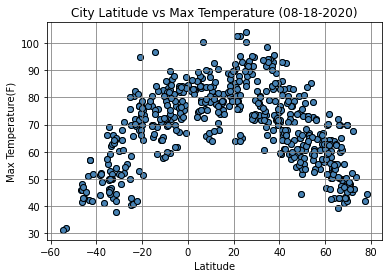

In [9]:
# Create a Scatter Plot for Latitude vs Temperature

x_values = clean_city_weather_df['Lat']
y_values = clean_city_weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title(f"City Latitude vs Max Temperature ({value:%m-%d-%Y})")
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")
plt.grid(which='major', color='gray')

# Save and show the Scatter Plot

plt.savefig('output_data/fig1.png')
plt.show()


## Latitude vs. Humidity Plot

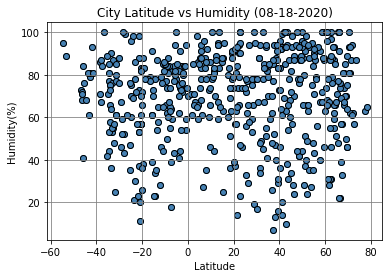

In [10]:
# Create a Scatter Plot for Latitude vs Humidity

x_values = clean_city_weather_df['Lat']
y_values = clean_city_weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f"City Latitude vs Humidity ({value:%m-%d-%Y})")
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")
plt.grid(which='major', color='gray')

# Save and show the Scatter Plot

plt.savefig('output_data/fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

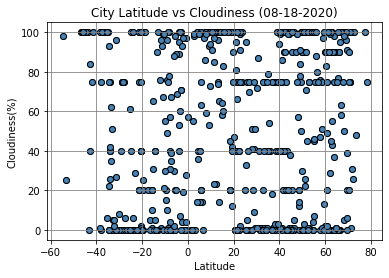

In [11]:
# Create a Scatter Plot for Latitude vs Humidity

x_values = clean_city_weather_df['Lat']
y_values = clean_city_weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f"City Latitude vs Cloudiness ({value:%m-%d-%Y})")
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")
plt.grid(which='major', color='gray')

# Save and show the Scatter Plot

plt.savefig('output_data/fig3.png')
plt.show()


## Latitude vs. Wind Speed Plot

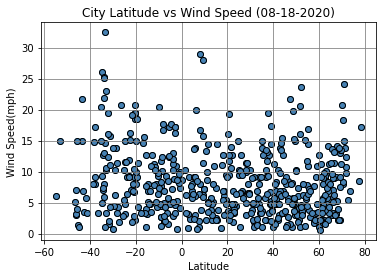

In [12]:
# Create a Scatter Plot for Latitude vs Wind Speed

x_values = clean_city_weather_df['Lat']
y_values = clean_city_weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title(f"City Latitude vs Wind Speed ({value:%m-%d-%Y})")
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")
plt.grid(which='major', color='gray')

# Save and show the Scatter Plot

plt.savefig('output_data/fig4.png')
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

# Define a Python function to create a linear regression and plot it
def linear_regression_function(x_data,y_data,x,y,labelx,labely,lrtitle):
    plt.scatter(x_values, y_values, marker="o", facecolors="steelblue")
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(lrtitle)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data,y_data)
    regress_values = x_data * slope + intercept
    print(f"The r-squared is: {rvalue**2}")
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")


In [14]:
# Create Northern and Southern Hemisphere DataFrames

northern_clean_city_weather_df = clean_city_weather_df.loc[clean_city_weather_df["Lat"] >= 0, :]

southern_clean_city_weather_df = clean_city_weather_df.loc[clean_city_weather_df["Lat"] < 0, :]


In [15]:
# View Northern Hemisphere DataFrame

northern_clean_city_weather_df.style.hide_index()

City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
San Cristobal,7.770000,-72.220000,65.750000,86,100,1.990000,VE,1597733679
Aklavik,68.220000,-135.010000,55.400000,66,5,2.240000,CA,1597733284
Harper,4.380000,-7.720000,74.500000,86,100,7.940000,LR,1597733350
Vila Franca do Campo,37.720000,-25.430000,73.400000,94,75,19.460000,PT,1597733298
Doha,25.290000,51.530000,104.000000,33,0,10.290000,QA,1597733680
Bari,41.120000,16.850000,81.000000,61,40,5.820000,IT,1597733569
Tiksi,71.690000,128.870000,45.250000,94,100,10.760000,RU,1597733316
Naze,28.370000,129.480000,91.400000,66,20,11.410000,JP,1597733297
Nanortalik,60.140000,-45.240000,46.710000,74,83,1.320000,GL,1597733335
Kapaa,22.080000,-159.320000,78.800000,74,75,12.750000,US,1597733075


In [16]:
# View Northern Hemisphere DataFrame

southern_clean_city_weather_df.style.hide_index()

City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
Bluff,-46.600000,168.330000,45.720000,73,100,5.100000,NZ,1597733279
Saint-Philippe,-21.360000,55.770000,77.000000,53,20,6.930000,RE,1597733289
Rikitea,-23.120000,-134.970000,72.050000,78,0,11.860000,PF,1597733277
Port Lincoln,-34.730000,135.870000,55.330000,71,100,26.020000,AU,1597733333
Avarua,-21.210000,-159.780000,71.600000,73,100,6.930000,CK,1597733295
New Norfolk,-42.780000,147.060000,57.000000,79,84,3.560000,AU,1597733292
Hithadhoo,-0.600000,73.080000,84.040000,74,0,9.890000,MV,1597733285
Punta Arenas,-53.150000,-70.920000,32.000000,89,25,14.990000,CL,1597733283
Mataura,-46.190000,168.860000,41.520000,72,100,2.980000,NZ,1597733279
Carnarvon,-24.870000,113.630000,69.800000,60,40,14.990000,AU,1597733569


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5264725327001971


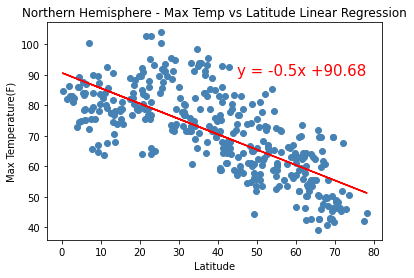

In [17]:
x_values = northern_clean_city_weather_df['Lat']
y_values = northern_clean_city_weather_df['Max Temp']

x = 45
y = 90

labelx = "Latitude"
labely = "Max Temperature(F)"
lrtitle = "Northern Hemisphere - Max Temp vs Latitude Linear Regression"

linear_regression_function(x_values,y_values,x,y,labelx,labely,lrtitle)

# Save and show the scatter plot and linear regression
plt.savefig('output_data/LRFig1.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.58218736083499


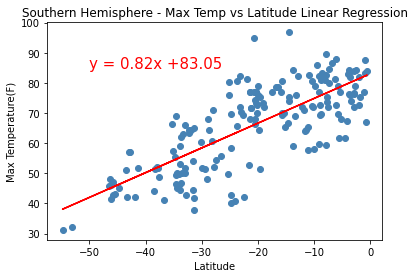

In [25]:
x_values = southern_clean_city_weather_df['Lat']
y_values = southern_clean_city_weather_df['Max Temp']

x = -50
y = 85

labelx = "Latitude"
labely = "Max Temperature(F)"
lrtitle = "Southern Hemisphere - Max Temp vs Latitude Linear Regression"

linear_regression_function(x_values,y_values,x,y,labelx,labely,lrtitle)

# Save and show the scatter plot and linear regression
plt.savefig('output_data/LRFig2.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001835170984346218


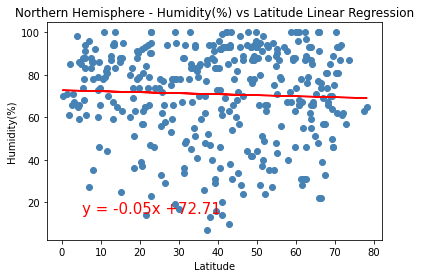

In [28]:
x_values = northern_clean_city_weather_df['Lat']
y_values = northern_clean_city_weather_df['Humidity']

x = 5
y = 15

labelx = "Latitude"
labely = "Humidity(%)"
lrtitle = "Northern Hemisphere - Humidity(%) vs Latitude Linear Regression"

linear_regression_function(x_values,y_values,x,y,labelx,labely,lrtitle)

# Save and show the scatter plot and linear regression
plt.savefig('output_data/LRFig3.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0010409710676948924


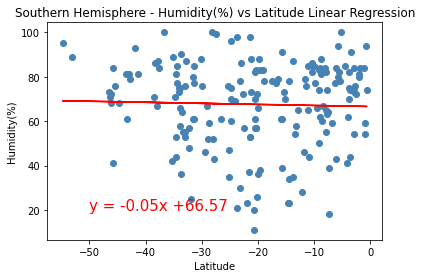

In [29]:
x_values = southern_clean_city_weather_df['Lat']
y_values = southern_clean_city_weather_df['Humidity']

x = -50
y = 20


labelx = "Latitude"
labely = "Humidity(%)"
lrtitle = "Southern Hemisphere - Humidity(%) vs Latitude Linear Regression"

linear_regression_function(x_values,y_values,x,y,labelx,labely,lrtitle)

# Save and show the scatter plot and linear regression
plt.savefig('output_data/LRFig4.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.000769505815169735


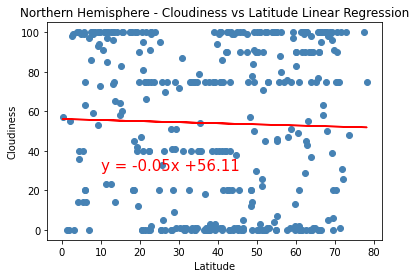

In [30]:
x_values = northern_clean_city_weather_df['Lat']
y_values = northern_clean_city_weather_df['Cloudiness']

x = 10
y = 30

labelx = "Latitude"
labely = "Cloudiness"
lrtitle = "Northern Hemisphere - Cloudiness vs Latitude Linear Regression"

linear_regression_function(x_values,y_values,x,y,labelx,labely,lrtitle)

# Save and show the scatter plot and linear regression
plt.savefig('output_data/LRFig5.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00842325736834798


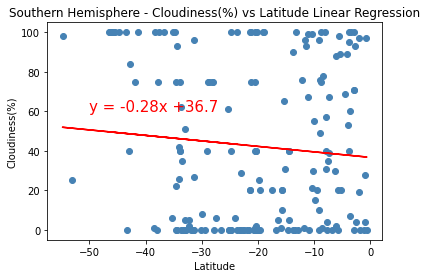

In [31]:
x_values = southern_clean_city_weather_df['Lat']
y_values = southern_clean_city_weather_df['Cloudiness']

x = -50
y = 60

labelx = "Latitude"
labely = "Cloudiness(%)"
lrtitle = "Southern Hemisphere - Cloudiness(%) vs Latitude Linear Regression"

linear_regression_function(x_values,y_values,x,y,labelx,labely,lrtitle)

# Save and show the scatter plot and linear regression
plt.savefig('output_data/LRFig6.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001230239994091219


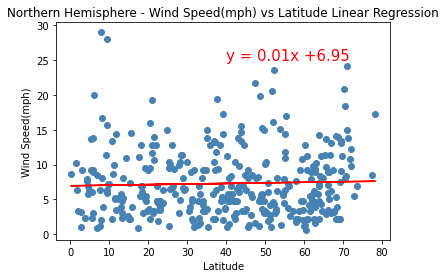

In [32]:
x_values = northern_clean_city_weather_df['Lat']
y_values = northern_clean_city_weather_df['Wind Speed']

x = 40
y = 25

labelx = "Latitude"
labely = "Wind Speed(mph)"
lrtitle = "Northern Hemisphere - Wind Speed(mph) vs Latitude Linear Regression"

linear_regression_function(x_values,y_values,x,y,labelx,labely,lrtitle)

# Save and show the scatter plot and linear regression
plt.savefig('output_data/LRFig7.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013809286994465148


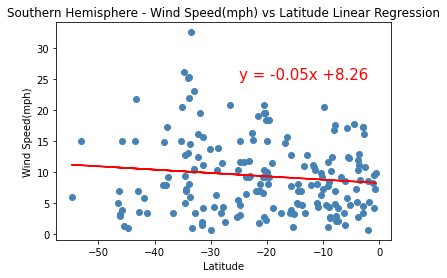

In [34]:
x_values = southern_clean_city_weather_df['Lat']
y_values = southern_clean_city_weather_df['Wind Speed']

x = -25
y = 25

labelx = "Latitude"
labely = "Wind Speed(mph)"
lrtitle = "Southern Hemisphere - Wind Speed(mph) vs Latitude Linear Regression"

linear_regression_function(x_values,y_values,x,y,labelx,labely,lrtitle)

# Save and show the scatter plot and linear regression
plt.savefig('output_data/LRFig8.png')
plt.show()